# Data Class

In [1]:
import random

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return "NEGATIVE"
        elif self.score == 3:
            return "NEUTRAL"
        else: #Score of 4 or 5
            return "POSITIVE"

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == "NEGATIVE", self.reviews))
        positive = list(filter(lambda x: x.sentiment == "POSITIVE", self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)

# Loading the Data

In [2]:
import pandas as pd
df = pd.read_json('Books_small_10000.json',lines=True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F2H80A1ZNN1N,B00GDM3NQC,Connie Correll,"[0, 0]","I bought both boxed sets, books 1-5. Really a...",5,Can't stop reading!,1390435200,"01 23, 2014"
1,AI3DRTKCSK4KX,B00A5MREAM,Grandma,"[0, 0]",I enjoyed this short book. But it was way way ...,3,A leaf on the wind of all hallows,1399593600,"05 9, 2014"
2,A3KAKFHY9DAC8A,0446547573,"toobusyreading ""Inspired Kathy""","[1, 1]",I love Nicholas Sparks. I&#8217;ve read everyt...,4,Great writing from Nicholas Sparks.,1404518400,"07 5, 2014"
3,ATYBCYD6BIXVL,0955809215,Chrissie,"[0, 0]",I really enjoyed this adventure and look forwa...,4,great,1389225600,"01 9, 2014"
4,A17K95SEU3J68U,0991500776,"Sirde ""artist761""","[0, 0]",It was a decent read.. typical story line. Not...,3,It was a decent read.. typical story line ...,1404864000,"07 9, 2014"
...,...,...,...,...,...,...,...,...,...
9995,A32FV8MF6KTRYE,0615676863,S.Wilson,"[0, 0]",The whole series was great! Melody is a fanta...,5,Great,1389830400,"01 16, 2014"
9996,A2IYZ41783TX4R,B00GG2DWO2,"Lynn Demsky ""Lynn/MI""","[0, 0]",I didn't thing that much of this book. I am a...,3,an anchor might have helped....,1391731200,"02 7, 2014"
9997,A1GHQOXZME7VLL,1482012294,CABorgford,"[0, 0]",It is an emotional TRIP to the past with Trip ...,5,Must Read Series - Timing is Everything,1388880000,"01 5, 2014"
9998,A37ZXVSFNM1UAZ,1481978063,"V. Jones ""Phoenix Rising""","[0, 0]",This definitely got under my veins whereby I h...,5,This story grew on me!,1392076800,"02 11, 2014"


# Simplifying our data

In [3]:
review = [Review(x, y) for x, y in zip(df['reviewText'], df['overall'])]
print('Text: ',review[3].text)
print('Score: ' ,review[3].score)
print('Sentiment: ' ,review[3].sentiment)

Text:  I really enjoyed this adventure and look forward to reading more of Robert Spire. I especially liked all the info on global warming. You did a good job on the research.
Score:  4
Sentiment:  POSITIVE


# Preparing the Data

In [27]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(review,test_size=0.25,random_state=42)

train_container = ReviewContainer(train)

test_container = ReviewContainer(test)

In [32]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count("POSITIVE"))
print(train_y.count("NEGATIVE"))

486
486


# Vectorization

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[3])
print(train_x_vectors[3].toarray())

didn't hold my interest .  There were some good parts but as a whole I didn't like it.  I know there are some really valuable things in the book  though but not enough I guess .
[[0. 0. 0. ... 0. 0. 0.]]


## Classification

### Linear SVM

In [7]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

print(test_x[3])
clf_svm.predict(test_x_vectors[3])

I found it very hard to connect with the author throughout this book.  The story came across to me as insincere, and more about selling books than sharing a belief or story.  Like other reviewers, I found Eben to be arrogant.  My wife reads a lot of books like this, and comparing notes afterwards she felt the same way.  The ending also seemed forced or contrived for dramatic effect.


array(['NEGATIVE'], dtype='<U8')

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

### Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)

clf_gnb.predict(test_x_vectors[0].toarray())

array(['POSITIVE'], dtype='<U8')

### Score of each classifier

In [10]:
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors.toarray(), test_y))

0.8449367088607594
0.6677215189873418
0.6424050632911392


### F1 score of SVM

In [11]:
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=["POSITIVE", "NEGATIVE"])

array([0.84444444, 0.84542587])

# Testing the Model

In [24]:
test_set = ['do not buy', "i would definetly recommend", 'worst book EVER!']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['NEGATIVE', 'POSITIVE', 'NEGATIVE'], dtype='<U8')

# Visualization

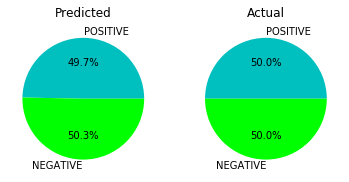

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

x=list(clf_svm.predict(test_x_vectors))

a1=(list(Counter(x).keys())) # unique values
a2=(list(Counter(x).values())) # counts the elements' frequency

plt.subplot(1,2,1)
plt.title("Predicted")
plt.pie(a2,labels=a1,autopct='%1.1f%%',colors=['c','lime'])

b1=(list(Counter(test_y).keys())) 
b2=(list(Counter(test_y).values())) 

plt.subplot(1,2,2)
plt.title("Actual")
plt.pie(b2,labels=b1,autopct='%1.1f%%',colors=['c','lime'])

plt.show()